# MINOR PROJECT- Data Science batch 3
# Adya Agrawal


<b>Exploratory Data Analysis</b>

Objective of this Analysis:
To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

In [1]:
import pandas as pd
import numpy as np

In [2]:
d=pd.read_csv('https://bit.ly/3bJhLfU')
d.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
d.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
d_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 
          'test_preparation_course', 'math', 'reading', 'writing']
d.columns = d_cols
d.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math', 'reading', 'writing'],
      dtype='object')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Minimum math score in the data is: 0
Maximum math score in the data is: 100
Range of math score is from 0 to 100, value is 100


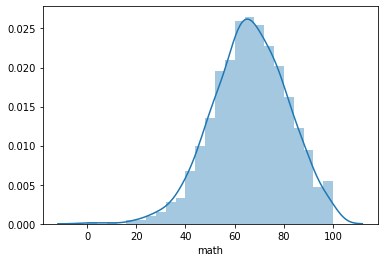

In [6]:
sns.distplot(d['math'])
print("Minimum math score in the data is:",d.math.min())
print("Maximum math score in the data is:",d.math.max())
print("Range of math score is from {} to {}, value is {}".format(d.math.min(),d.math.max(),d.math.max()-d.math.min()))

Minimum reading score in the data is: 17
Maximum reading score in the data is: 100
Range of reading score is from 17 to 100, value is 83


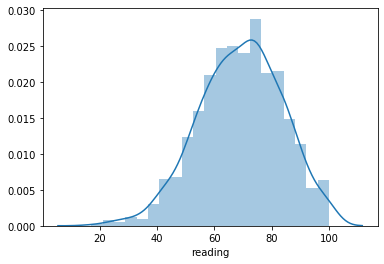

In [7]:
sns.distplot(d['reading'])
print("Minimum reading score in the data is:",d.reading.min())
print("Maximum reading score in the data is:",d.reading.max())
print("Range of reading score is from {} to {}, value is {}".format(d.reading.min(),d.reading.max(),d.reading.max()-d.reading.min()))

Minimum writing score in the data is: 10
Maximum writing score in the data is: 100
Range of writing score is from 10 to 100, value is 90


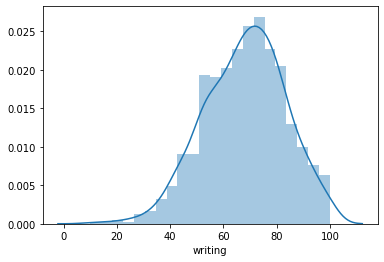

In [8]:
sns.distplot(d['writing'])
print("Minimum writing score in the data is:",d.writing.min())
print("Maximum writing score in the data is:",d.writing.max())
print("Range of writing score is from {} to {}, value is {}".format(d.writing.min(),d.writing.max(),d.writing.max()-d.writing.min()))

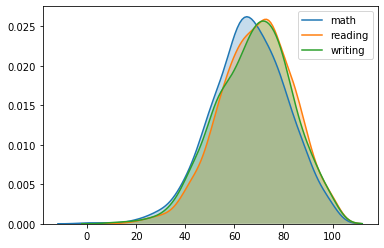

In [9]:
sns.kdeplot(d['math'],shade=True)
sns.kdeplot(d['reading'],shade=True)
sns.kdeplot(d['writing'],shade=True)

<b>From the three graphs we can say that marks are continuosly distributed and symmetric in the given data.
    Also we can see there are no outliers and null points in the data.</b>
    
  <b>  We can categorize students into 3 on the basis of the marks</b>

# Grades
Marks <b>above 80</b> is a <b>good score</b>:       <b>denoted by  Good</b>

Marks <b>between 40 to 80</b> is an <b>average score</b>:   <b>denoted by  Average</b>

Marks <b>below 40</b> is a <b>bad score</b>:       <b>denoted by  Bad</b>

In [10]:
math_m=d.math.tolist()
math_m
d['Math_grade']=[('Good' if a>80  else 'Average' if a>40  else 'Bad') for a in math_m]
d.Math_grade.head()

0    Average
1    Average
2       Good
3    Average
4    Average
Name: Math_grade, dtype: object

In [11]:
reading_m=d.reading.tolist()
reading_m
d['reading_grade']=[('Good' if a>80  else 'Average' if a>40  else 'Bad') for a in reading_m]
d.reading_grade.head()

0    Average
1       Good
2       Good
3    Average
4    Average
Name: reading_grade, dtype: object

In [12]:
writing_m=d.writing.tolist()
writing_m
d['writing_grade']=[('Good' if a>80  else 'Average' if a>40  else 'Bad') for a in writing_m]
d.writing_grade.head()

0    Average
1       Good
2       Good
3    Average
4    Average
Name: writing_grade, dtype: object

In [13]:
d.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
l=d.parental_level_of_education.tolist()
d['Parents_education']=[('1' if a=='some high school'else '1' if a=='high school'  else '2' if a=='some college'  else '3' if a=="associate's degree" else '4' if a=="bachelor's degree" else '5') for a in l]
d['Parents_education']

0      4
1      2
2      5
3      3
4      2
      ..
995    5
996    1
997    1
998    2
999    2
Name: Parents_education, Length: 1000, dtype: object

In [15]:
d.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math,reading,writing,Math_grade,reading_grade,writing_grade,Parents_education
0,female,group B,bachelor's degree,standard,none,72,72,74,Average,Average,Average,4
1,female,group C,some college,standard,completed,69,90,88,Average,Good,Good,2
2,female,group B,master's degree,standard,none,90,95,93,Good,Good,Good,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,Average,Average,Average,3
4,male,group C,some college,standard,none,76,78,75,Average,Average,Average,2


# Math scores and their relations with other variables shown with graphs and conclusions

## 1. Relation to gender

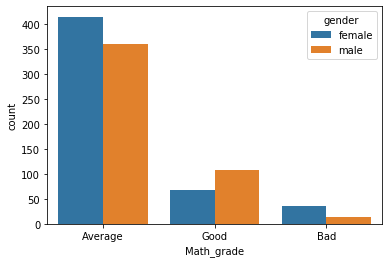

In [16]:
sns.countplot(x="Math_grade", data=d, hue = 'gender')

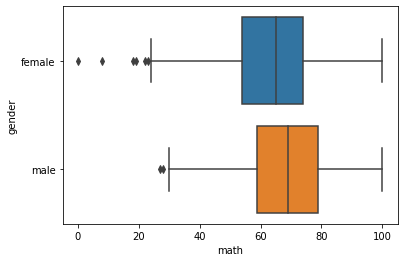

In [17]:
sns.boxplot(x='math',y='gender',data=d)

<b> CONCLUSION: </b>
Male students have higher ratio in A grade that is good scorers whereas more female students have average or bad scores.

<b>THUS WE CAN SEE THAT MALE STUDENTS HAVE BETTER MATH PERFORMANCE.</b>

## 2. Relation to ethnicity

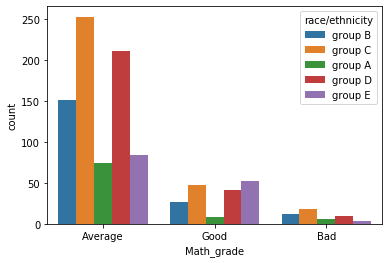

In [18]:
sns.countplot(x="Math_grade", data=d, hue = 'race/ethnicity')

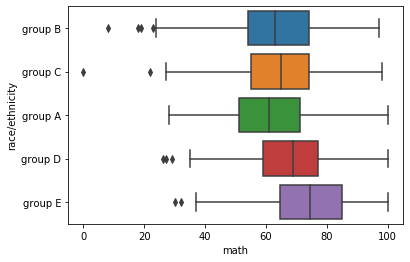

In [19]:
sns.boxplot(x='math',y='race/ethnicity',data=d)

<b>CONCLUSION: </b>
<b>THUS WE CAN SEE THAT AS WE MOVE FROM GROUP A TO E THE SCORES IN MATH SLIGHTLY KEEP INCREASING</b>


## 3. Relation to Parental level of education

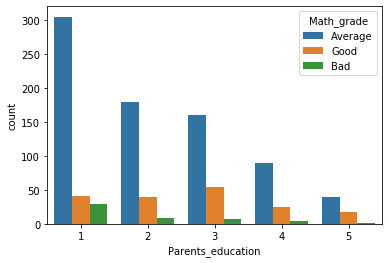

In [20]:
sns.countplot(x="Parents_education", data=d, hue = 'Math_grade')

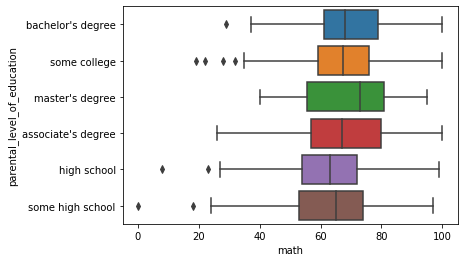

In [21]:
sns.boxplot(x='math',y='parental_level_of_education',data=d)

<b> CONCLUSION: </b>
From the above two graphs we can observe that students who have parental level of education of bachelor's degree, associate's degree and master's degree have higher scores than some college, some high school and high school.

<b>THUS WE CAN SEE THAT STUDENTS WITH MORE EDUCATED PARENTS HAVE BETTER MATH PERFORMANCE.</b>

## 4. Relation to Lunch

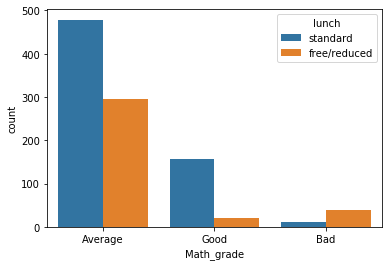

In [22]:
sns.countplot(x="Math_grade", data=d, hue = 'lunch')

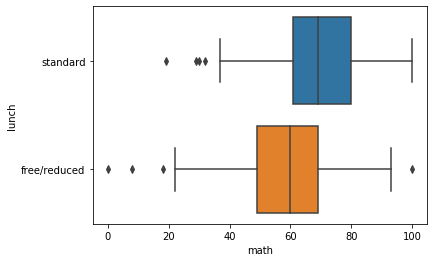

In [23]:
sns.boxplot(x='math',y='lunch',data=d)

<b>CONCLUSION: </b>
Good scoring students(A grade) MAJORLY take standard lunch wheareas average students(B grade) take both standard and reduced lunch and lastly bad scoring students(C grade) majorly take reduced lunch

<b>THUS WE CAN SEE THAT HAVING STANDARD LUNCH IS DIRECTLY IMPROVING THE STUDENTS MATH PERFORMANCE AS COMPARED TO REDUCED.</b>

## 5. Relation to Test Preparation Course

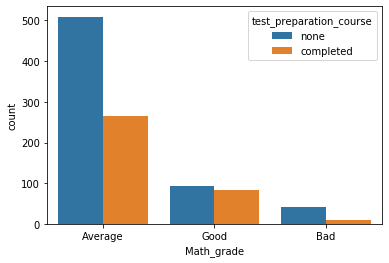

In [24]:
sns.countplot(x="Math_grade", data=d, hue = 'test_preparation_course')

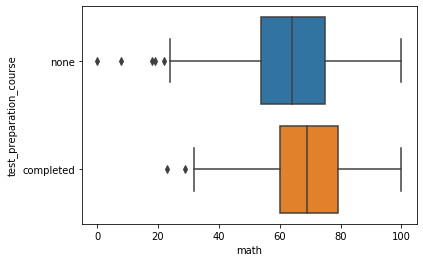

In [25]:
sns.boxplot(x='math',y='test_preparation_course',data=d)

<b>CONCLUSION: </b>
Good scoring students(A grade) have better ratio of students completing their preparation wheareas average students(B grade) and bad scoring students(C grade) have majority who have not completed their preparation.

<b>THUS WE CAN SEE THAT HAVING COMPLETED TEST PREPARATION COURSE IS DIRECTLY IMPROVING THE STUDENTS MATH PERFORMANCE.</b>

# Reading scores and their relations with other variables shown with graphs and conclusions

## 1. Relation to gender

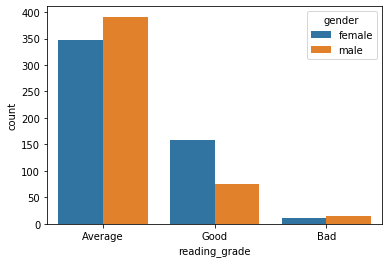

In [26]:
sns.countplot(x="reading_grade", data=d, hue = 'gender')

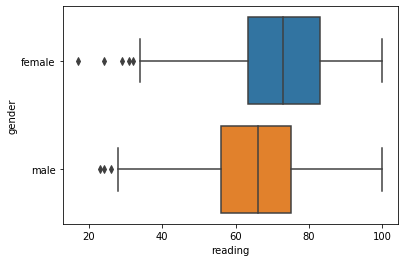

In [27]:
sns.boxplot(x='reading',y='gender',data=d)

<b> CONCLUSION: </b>
Female students have higher ratio in A grade that is good scorers whereas more male students have average or bad scores.

<b>THUS WE CAN SEE THAT FEMALE STUDENTS HAVE BETTER READING PERFORMANCE.</b>

## 2. Relation to ethnicity

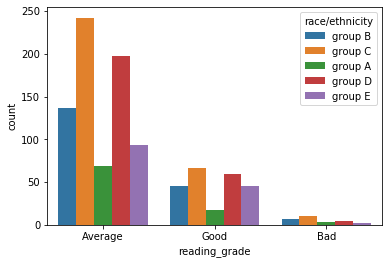

In [28]:
sns.countplot(x="reading_grade", data=d, hue = 'race/ethnicity')

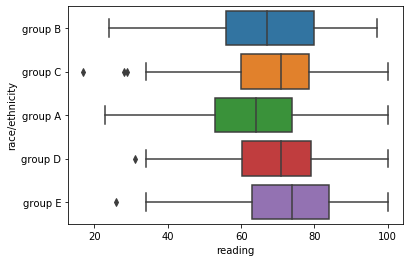

In [29]:
sns.boxplot(x='reading',y='race/ethnicity',data=d)

<b>CONCLUSION: </b>
<b>THUS WE CAN SEE THAT AS WE MOVE FROM GROUP A TO E THE SCORES IN READING SLIGHTLY KEEP INCREASING</b>


## 3. Relation to Parental level of education

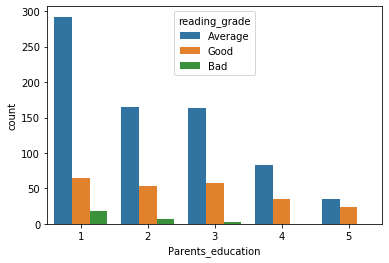

In [30]:
sns.countplot(x="Parents_education", data=d, hue = 'reading_grade')

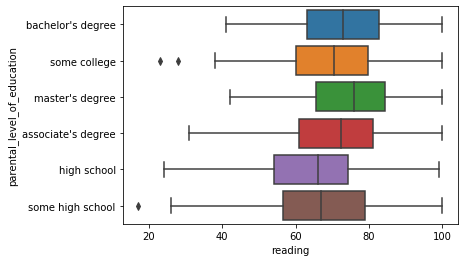

In [31]:
sns.boxplot(x='reading',y='parental_level_of_education',data=d)

<b> CONCLUSION: </b>
From the above two graphs we can observe that students who have parental level of education of bachelor's degree, associate's degree and master's degree have higher scores than some college, some high school and high school.

<b>THUS WE CAN SEE THAT STUDENTS WITH MORE EDUCATED PARENTS HAVE BETTER READING PERFORMANCE.</b>

## 4. Relation to Lunch

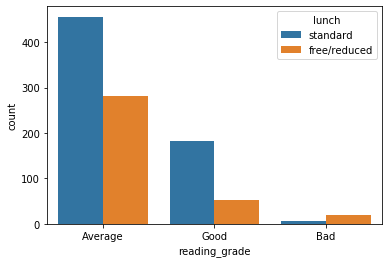

In [32]:
sns.countplot(x="reading_grade", data=d, hue = 'lunch')

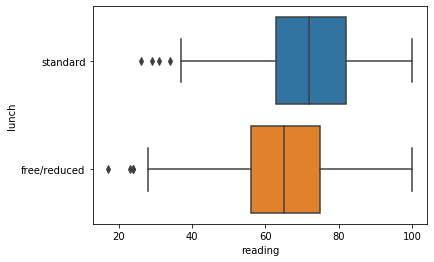

In [33]:
sns.boxplot(x='reading',y='lunch',data=d)

<b>CONCLUSION: </b>
Good scoring students(A grade) MAJORLY take standard lunch wheareas average students(B grade) take both standard and reduced lunch and lastly bad scoring students(C grade) majorly take reduced lunch

<b>THUS WE CAN SEE THAT HAVING STANDARD LUNCH IS DIRECTLY IMPROVING THE STUDENTS READING PERFORMANCE AS COMPARED TO REDUCED.</b>

## 5. Relation to Test Preparation Course

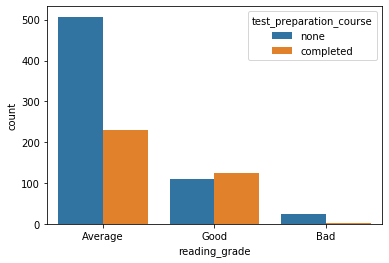

In [34]:
sns.countplot(x="reading_grade", data=d, hue = 'test_preparation_course')

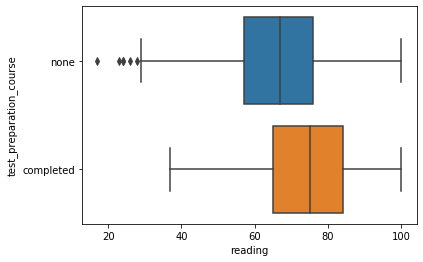

In [35]:
sns.boxplot(x='reading',y='test_preparation_course',data=d)

<b>CONCLUSION: </b>
Good scoring students(A grade) have more of students completing their preparation wheareas average students(B grade) and bad scoring students(C grade) have majority who have not completed their preparation.

<b>THUS WE CAN SEE THAT HAVING COMPLETED TEST PREPARATION COURSE IS DIRECTLY IMPROVING THE STUDENTS READING PERFORMANCE.</b>

# Writing scores and their relations with other variables shown with graphs and conclusions

## 1. Relation to gender

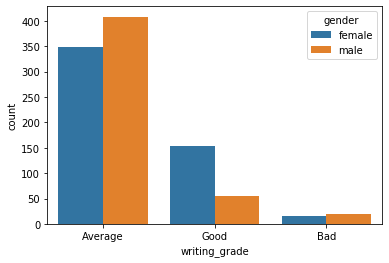

In [36]:
sns.countplot(x="writing_grade", data=d, hue = 'gender')

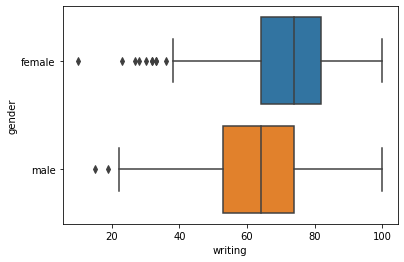

In [37]:
sns.boxplot(x='writing',y='gender',data=d)

<b> CONCLUSION: </b>
Female students have higher ratio in A grade that is good scorers whereas more male students have average or bad scores.

<b>THUS WE CAN SEE THAT FEMALE STUDENTS HAVE BETTER WRITING PERFORMANCE.</b>

## 2. Relation to ethnicity

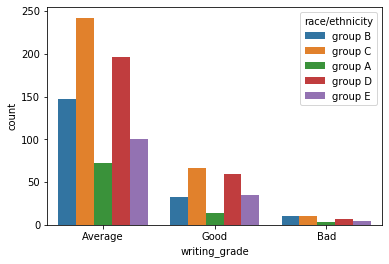

In [38]:
sns.countplot(x="writing_grade", data=d, hue = 'race/ethnicity')

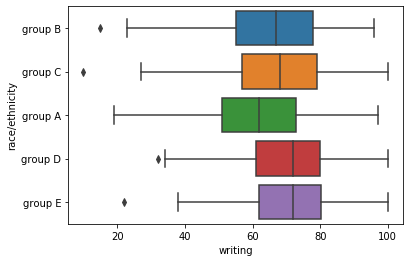

In [39]:
sns.boxplot(x='writing',y='race/ethnicity',data=d)

<b>CONCLUSION: </b>
<b>THUS WE CAN SEE THAT AS WE MOVE FROM GROUP A TO E THE SCORES IN WRITING SLIGHTLY KEEP INCREASING</b>


## 3. Relation to Parental level of education

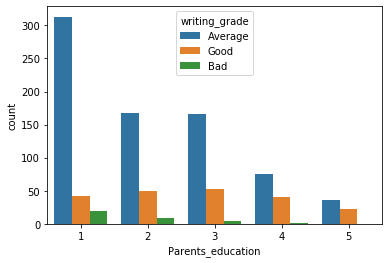

In [40]:
sns.countplot(x="Parents_education", data=d, hue = 'writing_grade')

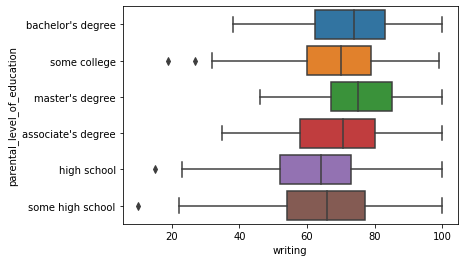

In [41]:
sns.boxplot(x='writing',y='parental_level_of_education',data=d)

<b> CONCLUSION: </b>
From the above two graphs we can observe that students who have parental level of education of bachelor's degree, associate's degree and master's degree have higher scores than some college, some high school and high school.

<b>THUS WE CAN SEE THAT STUDENTS WITH MORE EDUCATED PARENTS HAVE BETTER WRITING PERFORMANCE.</b>

## 4. Relation to Lunch

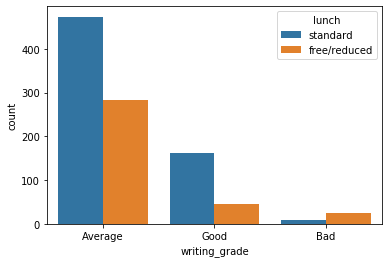

In [42]:
sns.countplot(x="writing_grade", data=d, hue = 'lunch')

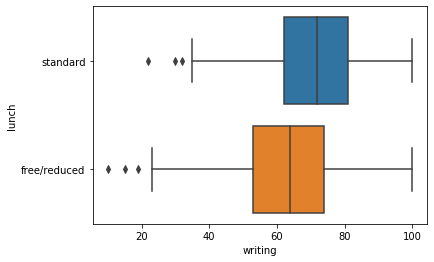

In [43]:
sns.boxplot(x='writing',y='lunch',data=d)

<b>CONCLUSION: </b>
Good scoring students(A grade) MAJORLY take standard lunch wheareas average students(B grade) take both standard and reduced lunch and lastly bad scoring students(C grade) majorly take reduced lunch

<b>THUS WE CAN SEE THAT HAVING STANDARD LUNCH IS DIRECTLY IMPROVING THE STUDENTS WRITING PERFORMANCE AS COMPARED TO REDUCED.</b>

## 5. Relation to Test Preparation Course

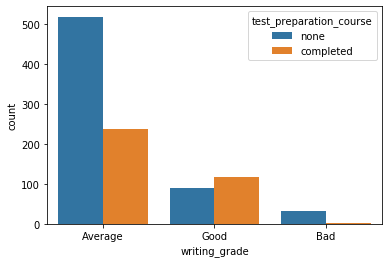

In [44]:
sns.countplot(x="writing_grade", data=d, hue = 'test_preparation_course')

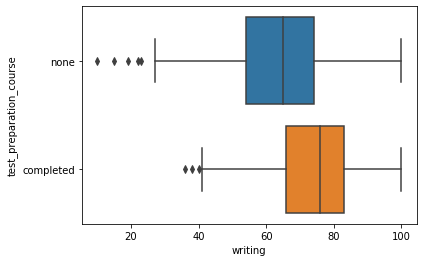

In [45]:
sns.boxplot(x='writing',y='test_preparation_course',data=d)

<b>CONCLUSION: </b>
Good scoring students(A grade) have more of students completing their preparation wheareas average students(B grade) and bad scoring students(C grade) have majority who have not completed their preparation.

<b>THUS WE CAN SEE THAT HAVING COMPLETED TEST PREPARATION COURSE IS DIRECTLY IMPROVING THE STUDENTS WRITING PERFORMANCE.</b>

# FINAL CONCLUSIONS
## 1. GENDER: <b>Male students</b> have better performance in <b>math</b> whereas <b>female students</b> have better performance in both <b>reading and writing.</b>
## 2. ETHNICITY: For all three scores math, reading and writing the performance of the students increase as we move from Group A to Group E.
## 3. PARENTAL LEVEL OF EDUCATION: Students whose parents have bachelor's degree, associate's degree and master's degree have higher scores in all three math, reading and writing compared to some college, some high school and high school. Therefore students with more educated parents score better
## 4. LUNCH: Students who take standard lunch have higher scores in all three math, reading and writing as compared to those who take free/reduced lunch.
## 5. TEST PREPARATION COURSE : Students who completed test preparation course have higher scores in all three math, reading and writing.|